### Шаг 1. Откройте файл с данными и изучите общую информацию. 


Импортируем необходимые для работы библиотеки, откроем все файлы и изучим их

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import display

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [3]:
# Функция выводящая основную информацию о датасете
def quick_info(data):
    print(data.info())
    print(data.columns)
    #display(data.head())

In [4]:
quick_info(calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')


<b> call_date </b> иммет неправильный тип данных, заметны подозрительные нули в продолжительности, пропусков и пробелов в названиях столбцов нет

In [5]:
quick_info(internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None
Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')


<b> session_date </b> иммет неправильный тип данных, лишний столбец с индексами <b> 'Unnamed' </b> пропусков и пробелов в названиях столбцов нет

In [6]:
quick_info(messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
Index(['id', 'message_date', 'user_id'], dtype='object')


<b> message_date </b> иммет неправильный тип данных, пропусков и пробелов в названиях столбцов нет

In [7]:
quick_info(tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None
Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')


<b> Никаких проблем нет. </b>

In [8]:
quick_info(users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')


<b> reg_date </b> и <b> churn_date </b>  имеют неправильный тип, <b> churn_date </b> имеет много пропусков, скорее всего связанных с тем, что эти клиенты от нас не уходили, пробелов в названии столбцов нет.

#### Вывод:  
просмотрев все 5 датафреймов можно сказать, что даты во всех из них имеют несоответствующий тип (object вместо datetime64), <b> 'calls' </b> содержит подозрительные нули в продолжительности звонков, <b> 'users'</b> имеют пропуски в дате ухода клиента, все качественные строчные характеристики лучше привести к нижнему регистру, а id в разных таблицах лучше переименновать, других проблем обнаружено не было.

### Шаг 2. Подготовьте данные <br>
<u1>
    <li> Приведите данные к нужным типам; </li>  
    <li> Найдите и исправьте ошибки в данных. </li>  
</u1> <br>
Посчитайте для каждого пользователя: 
<u1>
    <li> количество сделанных звонков и израсходованных минут разговора по месяцам; </li>  
    <li> количество отправленных сообщений по месяцам;</li>  
    <li> объем израсходованного интернет-трафика по месяцам;</li>  
    <li> помесячную выручку с каждого пользователя. </li>  
</u1>

Приведём к нужному типу даты в датафреймах:

In [9]:
calls['call_date'] = calls['call_date'].astype('datetime64')
internet['session_date'] = internet['session_date'].astype('datetime64')
messages['message_date'] = messages['message_date'].astype('datetime64')
users['reg_date'] = users['reg_date'].astype('datetime64')
users['churn_date'] = users['churn_date'].astype('datetime64')

Проверим результат:

In [10]:
print(calls['call_date'].dtype)
print(internet['session_date'].dtype)
print(messages['message_date'].dtype)
print(users['reg_date'].dtype)
print(users['churn_date'].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


Проверка прошла <b> успешно</b>, на всякий случай приведём значения к нижнему регистру, где это необходимо:

In [11]:
users['city'] = users['city'].str.lower()
users['first_name'] = users['first_name'].str.lower()
users['last_name'] = users['last_name'].str.lower()

Удалим лишний столбец в датафрейме internet:

In [12]:
del internet['Unnamed: 0']

Переименнуем столбцы id в разных таблицах, что б не запутаться

In [13]:
calls.rename(columns = {'id':'call_id'}, inplace = True)
messages.rename(columns = {'id':'message_id'},inplace = True)
internet.rename(columns = {'id':'session_id'}, inplace = True)

Добавим столбец с месяцем для каждой интересующей нас метрики

In [14]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
calls['month'] = pd.DatetimeIndex(calls['call_date']).month 
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

Избавимся от звонков продолжительностью 0. Пропущенные звонки сильно искозят данные в последствии. 

Сведём звонки, сообщения и интернет в одну таблицу

In [15]:
tariffs.rename(columns = {'tariff_name':'tariff'}, inplace = True)

In [16]:
# Сведём метрики с информацией о пользователях (вспомогательный шаг)
messages = messages.merge(users,  how ='left', on = 'user_id')
internet = internet.merge(users,  how ='left', on = 'user_id')
calls = calls.merge(users,  how ='left', on = 'user_id')

Для каждой метрики сделаем сводную таблицу для каждого пользователя

In [17]:
messagges_for_user = messages.pivot_table('message_id', index = ['user_id', 'month','tariff'],  aggfunc = 'count') 
internet_for_user = internet.pivot_table('mb_used', index = ['user_id', 'month','tariff'],  aggfunc = 'sum') 
calls_for_user = calls.pivot_table(['call_id', 'duration'], index = ['user_id', 'month','tariff'], aggfunc = {'call_id':'count','duration':'sum'})

Сводим всё в одну большую общую таблицу и посмотрим на неё

In [18]:
data = messagges_for_user.merge (internet_for_user, how ='outer', on = ['user_id', 'month','tariff'])
data = data.merge( calls_for_user, how ='outer',  on = ['user_id', 'month','tariff'])
data = data.reset_index()
data = data.merge(users, how ='inner', on = ['user_id','tariff'])
data = data.merge(tariffs, how ='left', on ='tariff')

Переименнуем message_id и call_id 

In [19]:
data.rename(columns = {'message_id':'messages_counts'}, inplace = True)
data.rename(columns = {'call_id':'calls_counts'}, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
tariff                   3214 non-null object
messages_counts          2717 non-null float64
mb_used                  3203 non-null float64
calls_counts             3174 non-null float64
duration                 3174 non-null float64
age                      3214 non-null int64
churn_date               187 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_m

### Заполмним пропуски в получившейся таблице:

Есть предположение, что пропуски появялются в случаях, когда пользователь перешёл на другой тариф (и данные утерялись), и, что пропуски зависят от тарифа, поэтому заполняя пропуски буду также обращать внимание на эти 2 момента. 

In [20]:
data.min()

user_id                                 1000
month                                      1
tariff                                 smart
messages_counts                            1
mb_used                                    0
calls_counts                               1
duration                                   0
age                                       18
churn_date               2018-08-17 00:00:00
city                             архангельск
first_name                         авксентий
last_name                            абаимов
reg_date                 2018-01-01 00:00:00
messages_included                         50
mb_per_month_included                  15360
minutes_included                         500
rub_monthly_fee                          550
rub_per_gb                               150
rub_per_message                            1
rub_per_minute                             1
dtype: object

Из информации о минимальных значениях можно сделать вывод, что<b> calls_counts</b> всегда, как минимум 1, то есть, если пользователь не звонил ни разу - то ставится пропуск, то же самое можно сказать про <b> messages_counts </b> и по той же логике <b> mb_used </b> нужно обрабатывать иначе. 

In [21]:
# Функция, сравнивающая количество пропусков по разным тарифам 
def comparison_passes(atribut):  
    passes = data[data[atribut].isnull()]
    x = passes[passes['tariff'] == 'smart']['month']
    y = passes[passes['tariff'] == 'ultra']['month']
    x.plot(label = 'smart', kind ='hist', legend ='smart', grid = True, alpha = 0.5);
    y.plot(label = 'ultra', kind ='hist', legend ='ultra', grid = True, alpha = 0.5);

In [22]:
disconected = data [data['churn_date'] == data['churn_date']]

#### Пропуски в 'calls_counts' и 'duration'. 
Пропусков одинаковое количество, проверим их взаимосвязь. 

In [23]:
len(data [data['calls_counts'].isnull() & data['duration'].isnull()])

40

Построив гистограмму, определив пропуски по месяцам по тарифам

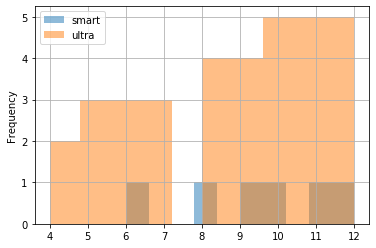

In [24]:
comparison_passes('calls_counts')

Пропуски в звонках наинаются со 1-го месяца и растут до 12-го ( рост обусловлен притоком новых пользователей) , пользователи, пользующиеся тарифом <b> 'ultra'</b> имеют больше пропусков, чем тарифом <b> 'smart'</b>. Проверим, пропуски на взаимосвязь с датой отключения.

In [25]:
len(disconected[disconected['calls_counts'].isnull()])

0

Взаимосвязи с датой отключения нет. Предположительно, все строки имеющие пропуски в продолжительности обоснованы пропусками в количестве звонков. Заполним данные пропуски нулями:

In [26]:
data['calls_counts'] = data['calls_counts'].fillna(0)
data['duration'] = data['duration'].fillna(0)

#### Пропуски в 'mb_used'

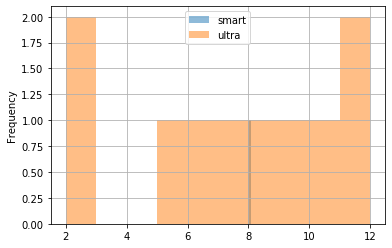

In [27]:
comparison_passes('mb_used')

Пропуски в <b> 'mb_used' </b> присущи преимущественно пользователям тарифа <b> 'ultra' </b>

In [28]:
len(data [data['mb_used'].isnull()]) 

11

In [29]:
len(disconected[disconected['mb_used'].isnull()])

1

In [30]:
#data[data['mb_used'] == 0]

In [31]:
#data [data['mb_used'].isnull()]

Предположение, что 2 пользователя с <b> mb_used = 0 </b> действительно умудрились потратить меньше мегабайта за сессию. А пропуски свидетельствуют об отсутствии интернет сессий в течение месяца вовсе.<b> user_id = 1273 </b> не пользуется интернетом с момента регистрации. Не было сессий -> потраченных мегабайтов ноль. Заполняем пропуски нулями:

In [32]:
data['mb_used'] = data['mb_used'].fillna(0)

#### Пропуски в 'messages_counts'

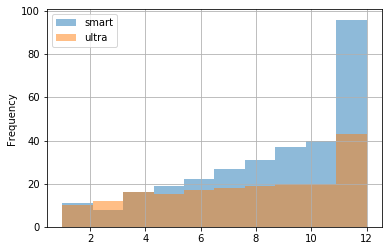

In [33]:
comparison_passes('messages_counts')

In [34]:
len(data[data['messages_counts'].isnull()])

497

In [35]:
len(disconected[disconected['messages_counts'].isnull()])

47

Уже не 0 конечно, но всё равно не достаточно, чтобы утверждать зависимость

In [36]:
data['messages_counts'] = data['messages_counts'].fillna(0)

Проверим, что все пропуски заполнены ( <b> churn_date </b> мы не заполняем)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
tariff                   3214 non-null object
messages_counts          3214 non-null float64
mb_used                  3214 non-null float64
calls_counts             3214 non-null float64
duration                 3214 non-null float64
age                      3214 non-null int64
churn_date               187 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_m

#### Посчитаем выручку с каждого пользователя

In [38]:
def revenue(row):
    messages_counts = row['messages_counts']
    duration = row['duration']
    mb_used = row['mb_used']
    messages_included = row['messages_included']
    mb_per_month_included = row['mb_per_month_included']
    minutes_included = row['minutes_included']
    rub_monthly_fee =  row['rub_monthly_fee']
    rub_per_gb = row['rub_per_gb']
    rub_per_message = row['rub_per_message']
    rub_per_minute = row['rub_per_minute']
    #Посчитаем прибыль за сообщения
    if messages_counts > messages_included:
        message_revenue = (messages_counts - messages_included) * rub_per_message 
    else: message_revenue = 0
    #Посчитаем прибыль за звонки
    if duration > minutes_included:
        calls_revenue = math.ceil(duration - minutes_included) * rub_per_minute 
    else: calls_revenue = 0    
    #Посчитаем прибыль за интернет
    if mb_used > mb_per_month_included:
        internet_revenue = math.ceil((mb_used - mb_per_month_included)/1024) * rub_per_gb 
    else: internet_revenue = 0    
    return rub_monthly_fee + message_revenue + calls_revenue + internet_revenue 
data['user_revenue'] = data.apply(revenue, axis =1) 

### Шаг 3. Проанализируйте данные
Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [39]:
for_smart = data[data['tariff'] == 'smart']
for_ultra = data[data['tariff'] == 'ultra']

In [40]:
for_smart_des = for_smart.loc[:,'messages_counts': 'duration'].describe().loc['mean':'std', :]
for unique in for_smart_des:
    for_smart_des.loc['disp', unique] = for_smart_des.loc['std', unique] ** 2

In [41]:
for_ultra_des = for_ultra.loc[:,'messages_counts': 'duration'].describe().loc['mean':'std', :]
for unique in for_ultra_des:
    for_ultra_des.loc['disp', unique] = for_ultra_des.loc['std', unique] ** 2

Для тарифа <b>'ultra'</b> характерны бОльшие средние значения, однако также растёт и дисперсия и, соответствуенно, стандартное отклонение.

In [42]:
def comparison_describe(atribut): 
    st = 'Распределение по ' + atribut
    x = for_smart[atribut]
    y = for_ultra[atribut]
    x.plot(label = 'smart', kind ='hist', legend ='smart', grid = True, alpha = 0.5, figsize = (12.5,8), bins = 50);
    y.plot(label = 'ultra', kind ='hist', legend ='ultra', grid = True, alpha = 0.5 , title = st, bins = 50);

In [43]:
for_smart['duration'].describe()

count    2229.000000
mean      394.427026
std       179.962207
min         0.000000
25%       267.230000
50%       397.980000
75%       515.070000
max      1354.220000
Name: duration, dtype: float64

In [44]:
for_ultra['duration'].describe()

count     985.000000
mean      497.068223
std       299.904152
min         0.000000
25%       267.750000
50%       488.100000
75%       711.470000
max      1578.060000
Name: duration, dtype: float64

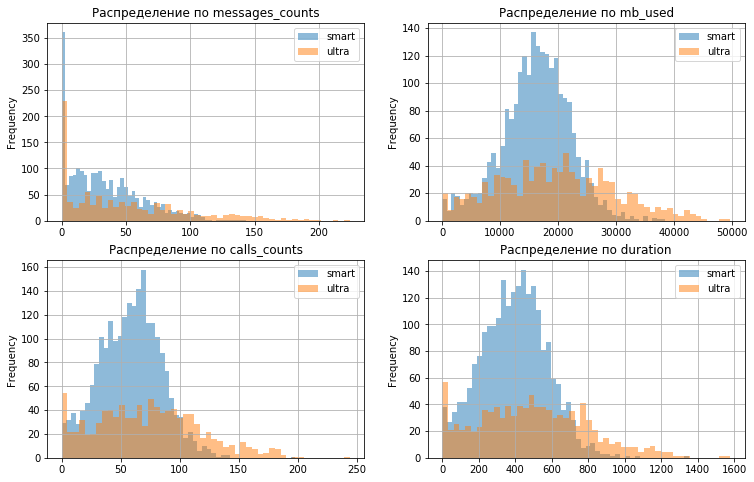

In [45]:
plt.subplot(2,2,1)
comparison_describe('messages_counts')
plt.subplot(2,2,2)
comparison_describe('mb_used')
plt.subplot(2,2,3)
comparison_describe('calls_counts')
plt.subplot(2,2,4)
comparison_describe('duration')

<H5> Для 'messages_counts': </H5> характерен пик для обоих тарифов в нуле, и второй в районе 30, далее следует убывающий хвост, который для тарифа <b>'smart'</b> доходит до 143, а для <b>'ultra'</b> до 224.

<H5> Для 'mb_used': </H5> распределения для обоих тарифов схожи с нормальными распределениями, среднее примерно равно медиане; у <b>'smarta'</b> это среднее 16200 у <b>'ultra'</b> - 19300. Распределение тарифа <b>'ultra'</b> более "сплюснут" к оси х, из за высокого станлартного отклонения.

<H5> Для 'duration': </H5> для <b>'smarta'</b> характерно распределение похожее на нормальное, с максимальным значением около 400, но с длинным хвостом, доходящим до 1354. Для тарифа <b>'ultra'</b> ситуация похожая, распределение напомиинает нормальное, но из-за высокого стандартного отклонения более сплюснутый, имеет длинный хвост до 1578 и 2 пика, из-за которых распределение нельзя назвать нормальным: пик в 0 и в районе 800. Среднее значение близко к медиане и равно 497.

<H5> Для 'calls_counts': </H5> распределние очень схоже с <b>'duration'</b>. Вычислим корреляцию:

In [46]:
data.corr()['duration']['calls_counts'] 

0.9795655908098367

#### Вывод:  
мы выяснили числовые характеристики минут разговора, количества сообщений и объёма интернет-трафика для пользователей каждого тарифа в месяц - по всем позициям тариф <b>'ultra'</b> имеет большее среднее значение и дисперсию. Построили гистограммы распределения и описали их

### Шаг 4. Проверьте гипотезы
<u1> 
<li> средняя выручка пользователей тарифов «Ультра» и «Смарт» различается; </li>
<li> средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;.</li>
</u1>

<b> Сформулируем первую нулевую гипотезу:</b> средняя выручка пользователей тарифов «Ультра» и «Смарт» равна;<br>
<b> Альтернативная гипотеза:</b> средняя выручка пользователей тарифов «Ультра» и «Смарт» различна; <br>
Проверяем:

Подключим необходимые библиотеки, построим гистограму распределения и найдём средние:

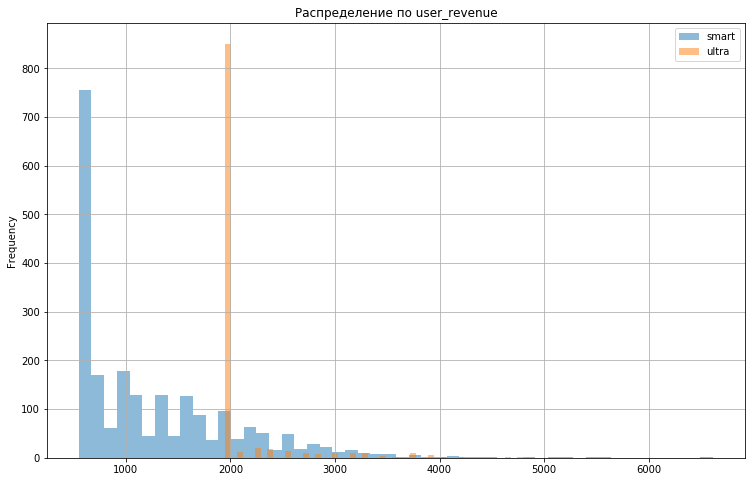

In [47]:
comparison_describe('user_revenue')

In [48]:
for_smart['user_revenue'].describe()['mean']

1257.5886047554957

In [49]:
for_ultra['user_revenue'].describe()['mean']

2070.1522842639592

Проведём т-тест и выясним справедливость гипотезы (пороговое значение альфа = 0.05:

In [50]:
from scipy import stats as st
for_smart_sample = for_smart['user_revenue']
for_ultra_sample = for_ultra['user_revenue']
alpha = .001
results = st.ttest_ind(
    for_smart_sample, 
    for_ultra_sample, equal_var = False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.179723168444486e-274
Отвергаем нулевую гипотезу


Для выбранного уровня значимости нулевая гипотеза отвергнута -> <b>средняя выручка пользователей разных тарифов не равна. </b> p-значение оказалось настолько малым, что даже если многократно уменьшить пороговое значение результат не изменится

<b> Сформулируем нулевую гипотезу для второго случая:</b> средняя выручка пользователей из Москвы равна выручке пользователей из других регионов;<br>
<b> Альтернативная гипотеза:</b> средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов; <br>
Проверяем:

Сделаем сводные таблицы для Москвы и регионов, узнаем с помощью метода describe() средние значения для Москвы и регионов.

In [51]:
for_moscow = data[data ['city'] =='москва']['user_revenue']
for_regions = data[data ['city'] !='москва']['user_revenue']
for_moscow.describe().mean()

1634.257425422602

In [52]:
for_regions.describe().mean()

2035.9878530872775

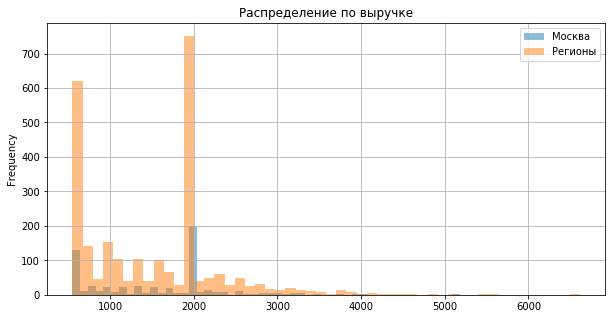

In [53]:
st = 'Распределение по выручке'
for_moscow.plot(label = 'Москва', kind ='hist', legend ='Москва', grid = True, alpha = 0.5, figsize = (10,5), bins = 50);
for_regions.plot(label = 'Регионы',  kind ='hist', legend ='Регионы', grid = True, alpha = 0.5 , title = st, bins = 50);

Проведём т-тест и выясним справедливость гипотезы:

In [54]:
#Почему-то заново нужно подключать библиотеку -_-
from scipy import stats as st
alpha = .05
results = st.ttest_ind(
    for_moscow, 
    for_regions, equal_var = False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.46532858228722906
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средняя выручка пользователей из Москвы и регионов неодинакова, с вероятностью в 46,5% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними выручками. 

#### Вывод:
мы проверили статистические гипотезу о разности средних выручек для пользователей разных тарифов и разных регионов, оказалось, что среедняя выручка разных тарифов различается (у тарифа 'ultra' она значимо больше), а для Москвы и регионов мы выяснили, что с вероятностью 46.5% различие в средней выручке можно получить случайно, что не даёт нам право отвергнуть нулевую гипотезу в пользу альтернативной, а значит мы не исключаем, что выручка от Московских пользователей и от пользователей регионов равна.

### Шаг 5. Напишите общий вывод

### Вывод:

<li> Мы открыли файлы, содержащие информацию о звонках, сообщениях, потреблении интернет-трафика, тариффах и пользователях 'Мегалайна'. Выяснили ошибки в датафреймах: несоответствующий типы данных, пропуски;
<li> Изменили все несоответствующие типы данных (object -> datetime64[ns]), удалили лишний столбец и, на всякий случай, привели строчные атрибуты к нижнему регистру;
<li> Изменили название столбца 'id' в разных датафреймах, чтобы не запутаться и добавим столбец с месяцем для каждой метрики, 'вычленив' его из даты;
<li> Свели звонки, сообщения и интернет в одну таблицу, затем добавили к ней информацию о пользователях и тарифных планах;
<li> Заполнили пропуски в 'calls_counts','duration', 'mb_used',  'messages_counts' нулями, churn_date не заполняем;
<li> Посчитали выручку для каждого пользователя и внесли её в общую таблицу;
<li> Описали сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитали среднее количество, дисперсию и стандартное отклонение. Построили гистограммы. Описали распределения. Выяснили, что по всем позициям тариф 'ultra' имеет большее среднее значение и дисперсию. Большая часть гистограмм напоминает нормальное распределение, с отклонениями от него в виде хвостов вправо и/или лишних пиковых значений;
<li> Исходя из схожести графиков, предполагая их сходство, вычислили корреляцию между 'duration' и 'calls_counts', она оказалась чуть меньше 98%;
<li> Проверили статистические гипотезу о разности средних выручек для пользователей разных тарифов и разных регионов, оказалось, что среедняя выручка разных тарифов различается (у тарифа 'ultra' она значимо больше);
<li> Проверили статистические гипотезу о разности выручек для Московских пользователей и региональных. Выяснили, что с вероятностью 46.5% различие в средней выручке можно получить случайно, что не даёт нам право отвергнуть нулевую гипотезу в пользу альтернативной. Выручка от Московских пользователей и от пользователей регионов равна.